In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
sns.set()

data = pd.read_pickle(r'C:\Users\admin\Desktop\Γιάννης\Πτυχιακή\files\TOV_tab_data.pkl')
data

,rho_c,M,R
0,5.500000e+14,0.507957,11.406522
1,5.555112e+14,0.518044,11.384600
2,5.610776e+14,0.528298,11.371477
3,5.666999e+14,0.538717,11.351460
4,5.723784e+14,0.549303,11.341045
...,...,...,...
195,3.843611e+15,1.686128,8.320061
196,3.882126e+15,1.682408,8.296979
197,3.921026e+15,1.678653,8.274018
198,3.960316e+15,1.674867,8.251185


In [ ]:
TargetVariable=['M','R']
Predictors=['rho_c']

X=data[Predictors].values
y=data[TargetVariable].values

from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140, 2)
(60, 1)
(60, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()

model.add(Dense(units=5, input_dim=1, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=25, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=15, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=20, kernel_initializer='normal', activation='relu'))

model.add(Dense(2, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train ,batch_size = 5, epochs = 50, verbose=1)

Epoch 1/50
28/28 [==============================] - 0s 778us/step - loss: 1.0552
Epoch 2/50
28/28 [==============================] - 0s 741us/step - loss: 1.0444
Epoch 3/50
28/28 [==============================] - 0s 815us/step - loss: 0.8862
Epoch 4/50
28/28 [==============================] - 0s 741us/step - loss: 0.3746
Epoch 5/50
28/28 [==============================] - 0s 815us/step - loss: 0.2131
Epoch 6/50
28/28 [==============================] - 0s 704us/step - loss: 0.1849
Epoch 7/50
28/28 [==============================] - 0s 815us/step - loss: 0.1710
Epoch 8/50
28/28 [==============================] - 0s 741us/step - loss: 0.1630
Epoch 9/50
28/28 [==============================] - 0s 741us/step - loss: 0.1539
Epoch 10/50
28/28 [==============================] - 0s 741us/step - loss: 0.1432
Epoch 11/50
28/28 [==============================] - 0s 778us/step - loss: 0.1305
Epoch 12/50
28/28 [==============================] - 0s 741us/step - loss: 0.1203
Epoch 13/50
28/28 [======

In [ ]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    batch_size_list=[5, 8, 10]
    epoch_list  =   [50, 100, 200]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            temp = pd.DataFrame({})
            
            TrialNumber+=1
            model = Sequential()
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='tanh'))

            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
            
            model.add(Dense(units=25, kernel_initializer='normal', activation='relu'))
            
            model.add(Dense(units=15, kernel_initializer='normal', activation='tanh'))
            
            model.add(Dense(units=20, kernel_initializer='normal', activation='relu'))

            model.add(Dense(2, kernel_initializer='normal'))

            model.compile(loss='mean_squared_error', optimizer='adam')

            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            
            y_mod       = model.predict(X_test)
            y_mod_norm  = np.sqrt(y_mod.T[0]**2 + y_mod.T[1]**2)
            y_test_norm = np.sqrt(y_test.T[0]**2 + y_test.T[1]**2)
            
            MAPE = np.mean(100 * (np.abs(y_test_norm-y_mod_norm)/y_test_norm))
            
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            temp = pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] )
            
            frames = [SearchResultsData,temp]
            
            SearchResultsData = pd.concat(frames, ignore_index = True)
    return(SearchResultsData)


ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

2/2 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 50 Accuracy: 97.96935893862357
2/2 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 100 Accuracy: 98.96280039526407
2/2 [==============================] - 0s 1ms/step
3 Parameters: batch_size: 5 - epochs: 200 Accuracy: 99.2959578392264
2/2 [==============================] - 0s 1ms/step
4 Parameters: batch_size: 8 - epochs: 50 Accuracy: 98.13920983389303
2/2 [==============================] - 0s 1000us/step
5 Parameters: batch_size: 8 - epochs: 100 Accuracy: 98.9118758195066
2/2 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 8 - epochs: 200 Accuracy: 98.68107765412391
2/2 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 92.85833572947558
2/2 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 98.9199938485639
2/2 [============================

<AxesSubplot:xlabel='Parameters'>

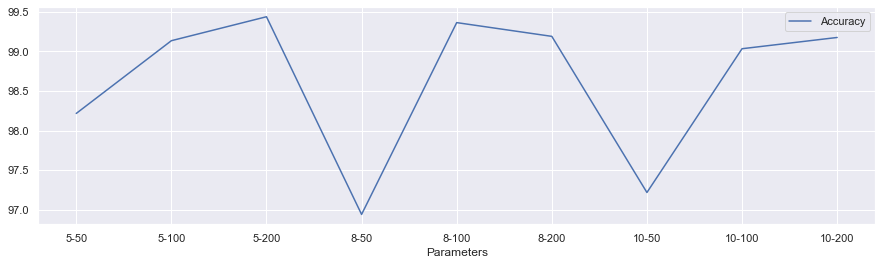

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

2/2 [==============================] - 0s 999us/step
The Accuracy of ANN model is: 99.88223163812738


Text(0.5, 1.0, 'Testing Data')

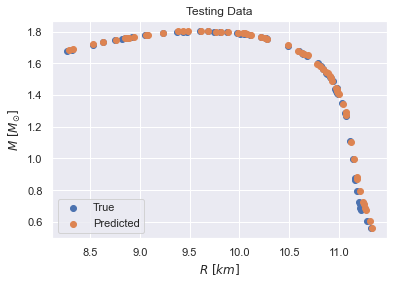

In [ ]:

model = Sequential()

model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=25, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=15, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=20, kernel_initializer='normal', activation='relu'))

model.add(Dense(2, kernel_initializer='normal'))


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


trial = model.fit(X_train, y_train ,batch_size = 5, epochs = 200, verbose=0, validation_split = 0.15)

Predictions=model.predict(X_test)

Predictions=TargetVarScalerFit.inverse_transform(Predictions)

y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)

TestingData['M'] = y_test_orig.T[0]
TestingData['R'] = y_test_orig.T[1]

TestingData['M_pred'] = Predictions.T[0]
TestingData['R_pred'] = Predictions.T[1]

Testing_norm   = np.sqrt(TestingData.M.values**2 + TestingData.R.values**2)
Predicted_norm = np.sqrt(TestingData.M_pred.values**2 + TestingData.R_pred.values**2)
Test_pred_norm = np.sqrt((TestingData.M.values-TestingData.M_pred.values)**2 + (TestingData.R.values-TestingData.R_pred.values)**2)


APE=100*(Test_pred_norm/Testing_norm)
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))

import matplotlib.pyplot as plt
x1 = TestingData.R.values
y1 = TestingData.M.values

x2 = TestingData.R_pred.values
y2 = TestingData.M_pred.values

plt.scatter(x1,y1, label = 'True')
plt.scatter(x2,y2, label = 'Predicted')
plt.legend()
plt.xlabel('$ R \ [km] $')
plt.ylabel('$ M \ [M_{\odot}] $')
plt.title('Testing Data')

5/5 [==============================] - 0s 750us/step


Text(0.5, 1.0, 'Trial data')

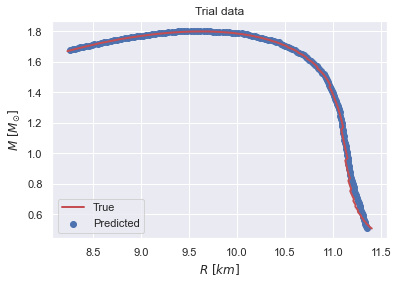

In [ ]:
import math

X = np.array([np.logspace(math.log10(min(data.rho_c)), math.log10(max(data.rho_c)), num = 150, base=10),]).T

trial_df = pd.DataFrame({})

trial_df['rho_c'] = X.T[0]

X=PredictorScalerFit.transform(X)

Predictions=model.predict(X)

Predictions=TargetVarScalerFit.inverse_transform(Predictions)




trial_df['M_pred'] = Predictions.T[0]
trial_df['R_pred'] = Predictions.T[1]

x1 = data.R.values
y1 = data.M.values

x2 = trial_df.R_pred.values
y2 = trial_df.M_pred.values

plt.plot(x1, y1, linewidth = 2, color = 'r', label = 'True')
plt.scatter(x2, y2, label = 'Predicted')

plt.legend()

plt.xlabel('$ R \ [km] $')
plt.ylabel('$ M \ [M_{\odot}] $')
plt.title('Trial data')

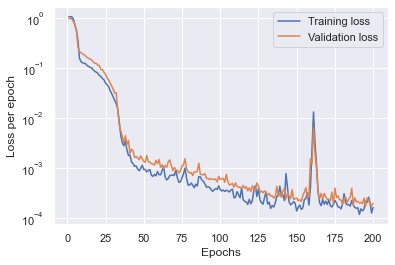

In [ ]:
eps = 200

val_loss_list = trial.history['val_loss']
loss_list     = trial.history['loss']
epos          = np.linspace(1,eps,eps)
plt.semilogy(epos, loss_list, label = 'Training loss')
plt.semilogy(epos, val_loss_list, label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss per epoch')
plt.legend()

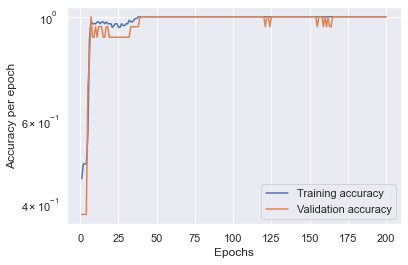

In [ ]:
val_acc_list = trial.history['val_accuracy']
acc_list     = trial.history['accuracy']
epos         = np.linspace(1,eps,eps)
plt.semilogy(epos, acc_list, label = 'Training accuracy')
plt.semilogy(epos, val_acc_list, label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy per epoch')
plt.legend()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# PredictorScaler=StandardScaler()


# X = np.array([np.linspace(min(data.rho_c), max(data.rho_c), 200),]).T

# trial_df['rho_c_lin'] = X.T[0]

# PredictorScaler=StandardScaler()


# PredictorScalerFit=PredictorScaler.fit(X)

# X=PredictorScalerFit.transform(X)

# Predictions=model.predict(X)

# Predictions=TargetVarScalerFit.inverse_transform(Predictions)




# trial_df['M_pred_lin'] = Predictions.T[0]
# trial_df['R_pred_lin'] = Predictions.T[1]

# x1 = data.R.values
# y1 = data.M.values

# x3 = trial_df.R_pred_lin.values
# y3 = trial_df.M_pred_lin.values

# plt.scatter(x1, y1, label = 'True')
# plt.scatter(x2, y2, label = 'Predicted log2')
# plt.scatter(x3, y3, marker = 's', label = 'Predicted lin')

# plt.legend()

# plt.xlabel('$ R \ [km] $')
# plt.ylabel('$ M \ [M_{\odot}] $')
# plt.title('Trial data')